# Load libraries

In [52]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)

In [2]:
#get the data source to scrape
url = r"https://publicinfobanjir.water.gov.my/hujan/data-hujan/?lang=en"
webpage = requests.get(url, verify=False)

C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


# Get States

In [3]:
#Find all the states, and the options
bs = BeautifulSoup(webpage.content, 'html.parser')
states = bs.find('select', {'id':'state'}).find_all('option')
statesDict = {}
for state in states:
    stateName = state.text.strip()
    if stateName not in statesDict:
        stateCode = state['value'].strip()
        if stateCode == '':
            continue
        statesDict[stateName] = stateCode

In [4]:
print(statesDict)


{'Perlis': 'PLS', 'Kedah': 'KDH', 'Pulau Pinang': 'PNG', 'Perak': 'PRK', 'Selangor': 'SEL', 'Wilayah Persekutuan Kuala Lumpur': 'WLH', 'Wilayah Persekutuan Putrajaya': 'PTJ', 'Negeri Sembilan': 'NSN', 'Melaka': 'MLK', 'Johor': 'JHR', 'Pahang': 'PHG', 'Terengganu': 'TRG', 'Kelantan': 'KEL', 'Sarawak': 'SRK', 'Sabah': 'SAB', 'Wilayah Persekutuan Labuan': 'WLP'}


# Get data of each state

In [28]:
#function to scrape rainfall data
def getStateRainFallData(url, stateCode, state, district, station):
    print(stateCode)
    #get the table from url
    stateDataUrl = requests.get(url, params = {'state':stateCode, 'district':district, 'station':station}, verify= False)
    bs = BeautifulSoup(stateDataUrl.content, 'html5lib')
    #print(bs)

    #get dates of recorded rainfall
    tableHead = bs.find('thead').find_all('th', {'style':"background-color:#aed9e5; color:black; padding:5px;"})
    rainfallDates = [*map(lambda x: x.text, tableHead)]
    rainfallDates
    rainfallDates = [*map(lambda x: datetime.strptime(x, r'%d/%m/%Y'), rainfallDates)]
    
    #get data for each station
    dataEntries = bs.find('tbody').find_all('tr')
    dataTable = []
    
    #get every row of data
    for dataEntry in dataEntries:
        if(len(dataEntry.contents)==0):
            continue
        cols = dataEntry.find_all('td')
        
        #format the data columns
        stationCode = cols[1].text
        station = cols[2].text
        district = cols[3].text
        dateStartCol = 5
        dateEndCol = dateStartCol + len(rainfallDates)
        
        #get the data for each day in table
        for dateEntry in range(len(rainfallDates)):
            dataExtracted = {'stateCode': stateCode, 'state': state, 'stationCode': stationCode, 'station':station, 'district':district, 'date':rainfallDates[dateEntry], 'rainfall':cols[dateStartCol + dateEntry].text}
            dataTable.append(dataExtracted)
            
    return dataTable
        
        
    '''
    for dataEntry in dataEntries:
        cols = dataEntry.find_all('td')
        print(cols)
    '''
    
    
    rainfallDates
    #dataEntry = table.find('tbody')
    #print(dataEntry)
        

In [29]:
url = r"https://publicinfobanjir.water.gov.my/wp-content/themes/shapely/agency/searchresultrainfall.php"
language = r"en"
dataAllStates = []


for state, stateCode in statesDict.items():
    print(state)
    data = getStateRainFallData(url, stateCode, state, 'ALL', 'ALL')
    dataAllStates = dataAllStates + data

Perlis
PLS
Kedah
KDH


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Pulau Pinang
PNG
Perak
PRK


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Selangor
SEL
Wilayah Persekutuan Kuala Lumpur
WLH


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Wilayah Persekutuan Putrajaya
PTJ
Negeri Sembilan
NSN


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Melaka
MLK
Johor
JHR


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Pahang
PHG
Terengganu
TRG


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Kelantan
KEL
Sarawak
SRK


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Sabah
SAB
Wilayah Persekutuan Labuan
WLP


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [80]:
DF = pd.DataFrame(dataAllStates)
DF

stateCode                             state stationCode  \
0          PLS                            Perlis     6602002   
1          PLS                            Perlis     6602002   
2          PLS                            Perlis     6602002   
3          PLS                            Perlis     6602002   
4          PLS                            Perlis     6602002   
5          PLS                            Perlis     6602002   
6          PLS                            Perlis     6602006   
7          PLS                            Perlis     6602006   
8          PLS                            Perlis     6602006   
9          PLS                            Perlis     6602006   
10         PLS                            Perlis     6602006   
11         PLS                            Perlis     6602006   
12         PLS                            Perlis     6602004   
13         PLS                            Perlis     6602004   
14         PLS                            Perlis     6602004   
15         PLS                            Perlis     6602004   
16         PLS                            Perlis     6602004   
17         PLS                            Perlis     6602004   
18         PLS                            Perlis     6502011   
19         PLS                            Perlis     6502011   
20         PLS                            Perlis     6502011   
21         PLS                            Perlis     6502011   
22         PLS                            Perlis     6502011   
23         PLS                            Perlis     6502011   
24         PLS                            Perlis     6502010   
25         PLS                            Perlis     6502010   
26         PLS                            Perlis     6502010   
27         PLS                            Perlis     6502010   
28         PLS                            Perlis     6502010   
29         PLS                            Perlis     6502010   
30         PLS                            Perlis     6502012   
31         PLS                            Perlis     6502012   
32         PLS                            Perlis     6502012   
33         PLS                            Perlis     6502012   
34         PLS                            Perlis     6502012   
35         PLS                            Perlis     6502012   
36         PLS                            Perlis     6402011   
37         PLS                            Perlis     6402011   
38         PLS                            Perlis     6402011   
39         PLS                            Perlis     6402011   
40         PLS                            Perlis     6402011   
41         PLS                            Perlis     6402011   
42         PLS                            Perlis     6402006   
43         PLS                            Perlis     6402006   
44         PLS                            Perlis     6402006   
45         PLS                            Perlis     6402006   
46         PLS                            Perlis     6402006   
47         PLS                            Perlis     6402006   
48         PLS                            Perlis     6402008   
49         PLS                            Perlis     6402008   
50         PLS                            Perlis     6402008   
51         PLS                            Perlis     6402008   
52         PLS                            Perlis     6402008   
53         PLS                            Perlis     6402008   
54         PLS                            Perlis     6402009   
55         PLS                            Perlis     6402009   
56         PLS                            Perlis     6402009   
57         PLS                            Perlis     6402009   
58         PLS                            Perlis     6402009   
59         PLS                            Perlis     6402009   
60         PLS                            Perlis     6403001   
61         PLS                       

# Save the obtained data

In [33]:
savePath = r"C:\Users\ryeoh\Project\RainFallAnalysis\data\rainFallData.csv"
DF.to_csv(savePath)

In [74]:
DF

stateCode                             state stationCode  \
0          PLS                            Perlis     6602002   
1          PLS                            Perlis     6602002   
2          PLS                            Perlis     6602002   
3          PLS                            Perlis     6602002   
4          PLS                            Perlis     6602002   
5          PLS                            Perlis     6602002   
6          PLS                            Perlis     6602006   
7          PLS                            Perlis     6602006   
8          PLS                            Perlis     6602006   
9          PLS                            Perlis     6602006   
10         PLS                            Perlis     6602006   
11         PLS                            Perlis     6602006   
12         PLS                            Perlis     6602004   
13         PLS                            Perlis     6602004   
14         PLS                            Perlis     6602004   
15         PLS                            Perlis     6602004   
16         PLS                            Perlis     6602004   
17         PLS                            Perlis     6602004   
18         PLS                            Perlis     6502011   
19         PLS                            Perlis     6502011   
20         PLS                            Perlis     6502011   
21         PLS                            Perlis     6502011   
22         PLS                            Perlis     6502011   
23         PLS                            Perlis     6502011   
24         PLS                            Perlis     6502010   
25         PLS                            Perlis     6502010   
26         PLS                            Perlis     6502010   
27         PLS                            Perlis     6502010   
28         PLS                            Perlis     6502010   
29         PLS                            Perlis     6502010   
30         PLS                            Perlis     6502012   
31         PLS                            Perlis     6502012   
32         PLS                            Perlis     6502012   
33         PLS                            Perlis     6502012   
34         PLS                            Perlis     6502012   
35         PLS                            Perlis     6502012   
36         PLS                            Perlis     6402011   
37         PLS                            Perlis     6402011   
38         PLS                            Perlis     6402011   
39         PLS                            Perlis     6402011   
40         PLS                            Perlis     6402011   
41         PLS                            Perlis     6402011   
42         PLS                            Perlis     6402006   
43         PLS                            Perlis     6402006   
44         PLS                            Perlis     6402006   
45         PLS                            Perlis     6402006   
46         PLS                            Perlis     6402006   
47         PLS                            Perlis     6402006   
48         PLS                            Perlis     6402008   
49         PLS                            Perlis     6402008   
50         PLS                            Perlis     6402008   
51         PLS                            Perlis     6402008   
52         PLS                            Perlis     6402008   
53         PLS                            Perlis     6402008   
54         PLS                            Perlis     6402009   
55         PLS                            Perlis     6402009   
56         PLS                            Perlis     6402009   
57         PLS                            Perlis     6402009   
58         PLS                            Perlis     6402009   
59         PLS                            Perlis     6402009   
60         PLS                            Perlis     6403001   
61         PLS                       

# Data Manipulation

In [81]:
#remove negative numbers from rainfall
DF['rainfall'] = DF['rainfall'].replace('-', 0)
DF['rainfall'] = DF['rainfall'].astype(float)
DF['rainfall'].loc[DF['rainfall']<0] = 0
DF['rainfall']

C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
30        0.0
31        0.0
32        0.0
33        0.0
34        0.0
35        0.0
36        0.0
37        0.0
38        0.0
39        0.0
40        0.0
41        0.0
42        0.0
43        0.0
44        0.0
45        0.0
46        0.0
47        0.0
48        0.0
49        0.0
50        0.0
51        0.0
52        0.0
53        0.0
54        0.0
55        0.0
56        0.0
57        0.0
58        0.0
59        0.0
60        0.0
61        1.0
62        0.0
63        0.0
64        0.0
65        0.0
66        0.0
67        0.0
68        0.0
69        0.0
70        0.0
71    

# Weekly rainfall average

Text(0.5, 1.0, 'Weekly rainfall average')

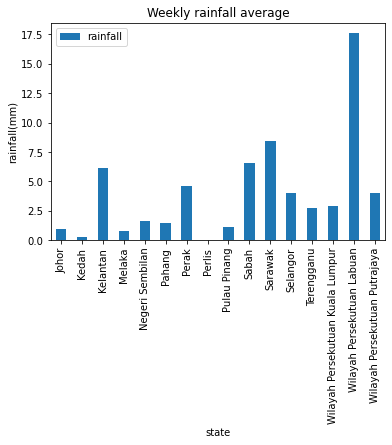

In [111]:
DFTest = DF
avg = DF.groupby('state')['rainfall'].mean().reset_index()
avg.plot(x='state', y='rainfall', kind = 'bar')
plt.ylabel('rainfall(mm)')
plt.title('Weekly rainfall average')

# Rainfall trend across week

state
Johor                               AxesSubplot(0.125,0.125;0.775x0.755)
Kedah                               AxesSubplot(0.125,0.125;0.775x0.755)
Kelantan                            AxesSubplot(0.125,0.125;0.775x0.755)
Melaka                              AxesSubplot(0.125,0.125;0.775x0.755)
Negeri Sembilan                     AxesSubplot(0.125,0.125;0.775x0.755)
Pahang                              AxesSubplot(0.125,0.125;0.775x0.755)
Perak                               AxesSubplot(0.125,0.125;0.775x0.755)
Perlis                              AxesSubplot(0.125,0.125;0.775x0.755)
Pulau Pinang                        AxesSubplot(0.125,0.125;0.775x0.755)
Sabah                               AxesSubplot(0.125,0.125;0.775x0.755)
Sarawak                             AxesSubplot(0.125,0.125;0.775x0.755)
Selangor                            AxesSubplot(0.125,0.125;0.775x0.755)
Terengganu                          AxesSubplot(0.125,0.125;0.775x0.755)
Wilayah Persekutuan Kuala Lumpur    AxesSubpl

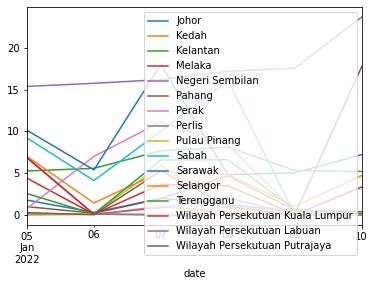

In [109]:
DFDayTrend = DF.groupby(['state', 'date'])['rainfall'].mean().reset_index()
DFDayTrend.set_index('date', inplace=True)
DFDayTrend.groupby('state')['rainfall'].plot()

In [57]:
DFStateWeeklyAverageRainfall.head()

0                                 Perlis
1                                 Perlis
2                                 Perlis
3                                 Perlis
4                                 Perlis
90                                 Kedah
91                                 Kedah
92                                 Kedah
93                                 Kedah
94                                 Kedah
504                         Pulau Pinang
505                         Pulau Pinang
506                         Pulau Pinang
507                         Pulau Pinang
508                         Pulau Pinang
702                                Perak
703                                Perak
704                                Perak
705                                Perak
706                                Perak
882                             Selangor
883                             Selangor
884                             Selangor
885                             Selangor
886             